In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2 as cv

import downloader as d 
import video as v

from typing import Tuple, Union
from numpy.typing import NDArray
from dataclasses import dataclass
from collections import deque

from importlib import reload

In [22]:
# sec -> starting second
def getFrame(sec: int = 0):

    # capture video
    video = cv.VideoCapture(video_path)
    # 2nd parameter converts seconds to miliseconds
    video.set(cv.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = video.read()
    if hasFrames:
        image = cv.resize(image, dsize=(600, 400))
        cv.imwrite(images_path + "/img"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames

In [ ]:
# for video in os.listdir(videos):
#     frame = os.path.join(videos, video)
#     frame = frame.resize(frame, dsize=(600, 400))
#     cv2.imshow('Display Image', frame)
#     # 0xff -> escape, 27 escape code as well
#     k = cv2.waitKey(30) & 0xff
#     # if escape key pressed
#     if k == 27:
#         break
# cv2.destroyAllWindows()

Video to Data Frame

In [23]:
def get_video(path: str) -> Tuple[NDArray, int]:
    vid = cv.VideoCapture(path)
    fps = vid.get(cv.CAP_PROP_FPS)
    #video = np.fromiter(vid, np.ndarray)
    frames = []
    ret = True
    while ret:
        ret, img = vid.read() # read one frame from the 'capture' object; img is (H, W, C)
        if ret:
            img = cv.resize(src=img, dsize=(100,100))
            img = cv.cvtColor(img, cv.COLOR_BGR2HLS)
            frames.append(img)
    # dimensions (T, H, W, C)
    return np.stack(frames, axis=0), int(round(fps))

def get_vid_df(path: str) -> pd.DataFrame:
    vid,fps = get_video(path)
    frames = vid.shape[0]
    height = vid.shape[1]
    width = vid.shape[2]
    df = pd.DataFrame(vid.reshape((-1,3)))
    df['frame'] = df.index // (width * height)
    df['x'] = df.index % width
    df['y'] = df.index // width % height
    df['second'] = df.frame // fps
    df = df.set_index(['frame','y','x']).rename(columns={
        0:'hue',
        1:'lightness',
        2:'saturation',
    })
    df.attrs['fps'] = fps
    df.attrs['height'] = height
    df.attrs['width'] = width
    return df

In [24]:
def get_mask(img: np.array):
    '''
    get the lightness mask
    '''

    Lchannel = img[:,:,1]
    mask = cv.inRange(Lchannel, 160, 255)
    #mask = np.where(255, 1, 0)

    return mask

<AxesSubplot: xlabel='frame'>

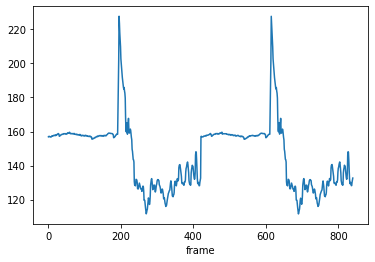

In [25]:
# let's work with plant explosion (hidden hazard)
path = 'videos/Plant explosion caught on camera.mp4'
df = get_vid_df(path)
df.groupby('frame').lightness.mean().plot()

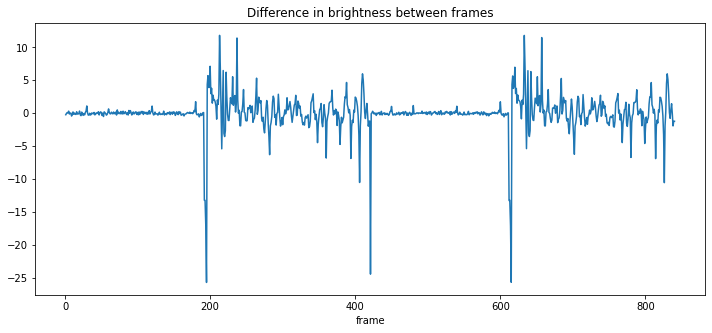

In [26]:
lightness_series = df.groupby('frame').lightness.mean()
lightness_df = lightness_series.to_frame()
lightness_df['next_frame'] = lightness_df.lightness.shift(1)
lightness_df['difference'] = lightness_df.next_frame - lightness_df.lightness

plt.figure(figsize=(12,5))
lightness_df.loc[:, 'difference'].plot()
plt.title('Difference in brightness between frames')
plt.show()

In [16]:
# save some images to folder
# images_path = 'video2'
# if not os.path.isdir(images_path):
#     os.mkdir(images_path)
# video_path = path
# sec = 0
# fps = 0.5 #//it will capture image in each 0.5 second
# #fps = video.get(cv2.CV_CAP_PROP_FPS)
# count=1

# while getFrame(sec):
#     count = count + 1
#     sec = sec + fps
#     sec = round(sec, 2)

In [27]:
img21 = cv.imread('video2/img21.jpg')

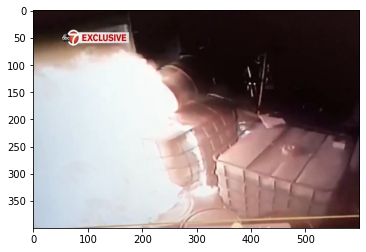

In [46]:
plt.imshow(img21)

In [39]:
img21.shape

(400, 600, 3)

In [47]:
img21_hls = cv.cvtColor(img21, cv.COLOR_BGR2HLS)

In [48]:
mask21 = get_mask(img21_hls)

In [49]:
masked_image = cv.bitwise_and(img21,img21,mask21)

In [50]:
masked_image.shape

(400, 600, 3)

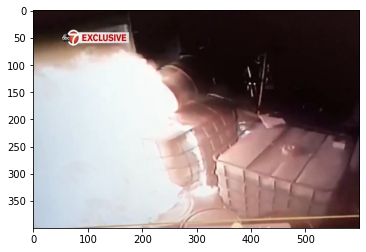

In [55]:
plt.imshow(masked_image)

In [52]:
img = cv.cvtColor(img21, cv.COLOR_BGR2HLS)

In [47]:
img.shape

(400, 600, 3)

In [39]:
get_mask(img).shape

(400, 600)

In [33]:
Lchannel = img[:,:,1]
mask = cv.inRange(Lchannel, 170, 255)

In [34]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [40]:
df.head()

hue  lightness  saturation  second
frame y x                                    
0     0 0   32         15          16       0
        1   32         15          16       0
        2   32         15          16       0
        3   32         15          16       0
        4   32         16          14       0

In [44]:
df.index.levels[0]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            831, 832, 833, 834, 835, 836, 837, 838, 839, 840],
           dtype='int64', name='frame', length=841)

In [45]:
df.index.get_level_values('frame')

Int64Index([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            ...
            840, 840, 840, 840, 840, 840, 840, 840, 840, 840],
           dtype='int64', name='frame', length=8410000)

In [46]:
df.index.levels[1]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', name='y')

In [63]:
df.loc[300].iloc[:, :-1]

hue  lightness  saturation
y  x                             
0  0    34         17          18
   1    33         16          17
   2    33         16          17
   3    33         16          17
   4    33         17          15
...    ...        ...         ...
99 95   49         19          18
   96   47         20          18
   97   47         18          18
   98   46         18          18
   99   44         17          15

[10000 rows x 3 columns]

In [64]:
df.loc[300].iloc[:, :-1].to_numpy()

array([[34, 17, 18],
       [33, 16, 17],
       [33, 16, 17],
       ...,
       [47, 18, 18],
       [46, 18, 18],
       [44, 17, 15]], dtype=uint8)

In [65]:
df.loc[300].iloc[:, :-1].to_numpy().shape

(10000, 3)

In [53]:
# save an image from the data frame, frame # 300
temp_im = df.loc[300].iloc[:, :-1].to_numpy().reshape(df.attrs['width'], df.attrs['height'], 3)

In [69]:
temp_im.shape

(100, 100, 3)

Text(0.5, 1.0, 'Image saved from video')

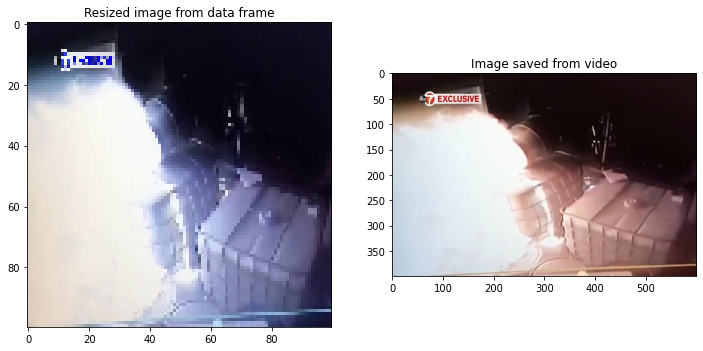

In [62]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(cv.cvtColor(temp_im, cv.COLOR_HLS2RGB))
plt.title('Resized image from data frame')
plt.subplot(122)
plt.imshow(img21)
plt.title('Image saved from video')

In [86]:
pd.Series(get_mask(temp_im).reshape(-1))

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: uint8

In [102]:
type(get_mask(temp_im))

numpy.ndarray

In [63]:
masked_im = cv.bitwise_and(temp_im, temp_im, get_mask(temp_im))

In [64]:
masked_im.shape

(100, 100, 3)

Text(0.5, 1.0, 'Masked image')

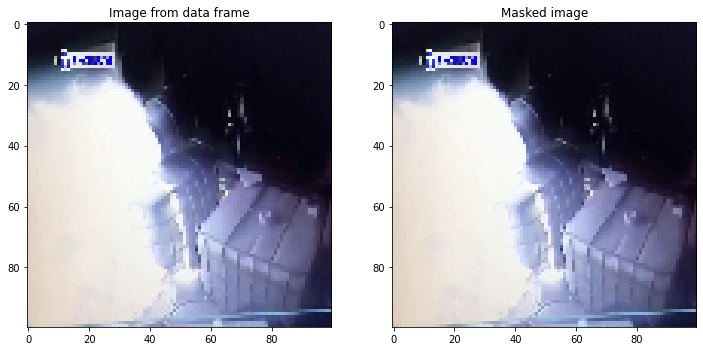

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(cv.cvtColor(temp_im, cv.COLOR_HLS2RGB))
plt.title('Image from data frame')
plt.subplot(122)
plt.imshow(cv.cvtColor(masked_im, cv.COLOR_HLS2RGB))
plt.title('Masked image')


In [68]:
# it didn't mask on 100x100 image
(masked_im == temp_im).sum() == df.attrs['width'] * df.attrs['height']*3

True

In [70]:
ser = pd.Series(dtype='uint8')

In [72]:
ser.info()

<class 'pandas.core.series.Series'>
Index: 0 entries
Series name: None
Non-Null Count  Dtype
--------------  -----
0 non-null      uint8
dtypes: uint8(1)
memory usage: 108.0+ bytes


In [87]:
# create Series to hold mask values from every frame
ser = pd.Series(dtype='uint8')
# loop through the frames
for f in df.index.levels[0]:
    # save an image to the variable 'frame'
    frame = df.loc[f].iloc[:, :-1].to_numpy().reshape(df.attrs['width'], df.attrs['height'], 3)
    # get the mask
    mask = get_mask(frame)
    ser = pd.concat([ser, pd.Series(mask.reshape(-1))], axis=0)

In [88]:
ser.info()

<class 'pandas.core.series.Series'>
Int64Index: 8410000 entries, 0 to 9999
Series name: None
Non-Null Count    Dtype
--------------    -----
8410000 non-null  uint8
dtypes: uint8(1)
memory usage: 72.2 MB


In [89]:
len(df) == len(ser)

True

In [90]:
ser.value_counts()

255    4473587
0      3936413
dtype: int64

In [91]:
ser.replace({255:1}, inplace=True)

In [92]:
ser.value_counts()

1    4473587
0    3936413
dtype: int64

In [86]:
ser.unique()

array([0, 1], dtype=uint8)

In [99]:
ser.to_numpy().shape

(8410000,)

In [97]:
# let's try the same but through numpy array
narr = np.empty((0,),dtype=np.uint8)

In [98]:
narr.shape

(0,)

In [103]:
# let's try the same but through numpy array
narr = np.empty((0,),dtype=np.uint8)
# loop through the frames
for f in df.index.levels[0]:
    # save an image to the variable 'frame'
    frame = df.loc[f].iloc[:, :-1].to_numpy().reshape(df.attrs['width'], df.attrs['height'], 3)
    # get the mask
    mask = get_mask(frame)
    narr = np.concatenate([narr, mask.reshape(-1)])

In [106]:
ser1 = pd.Series(narr)

In [107]:
ser1.value_counts()

255    4473587
0      3936413
dtype: int64

In [108]:
ser1.replace({255:1},inplace=True)

In [110]:
ser[:5]

0    0
1    0
2    0
3    0
4    0
dtype: uint8

In [111]:
ser1[:5]

0    0
1    0
2    0
3    0
4    0
dtype: uint8

In [112]:
ser.tail()

9995    0
9996    0
9997    0
9998    0
9999    0
dtype: uint8

In [113]:
ser1.tail()

8409995    0
8409996    0
8409997    0
8409998    0
8409999    0
dtype: uint8

In [114]:
df.tail()

hue  lightness  saturation  second
frame y  x                                     
840   99 95  118         26         135      28
         96  113         22         153      28
         97  113         20         155      28
         98  119         23         133      28
         99  120         22         151      28

In [119]:
# df.assign(
#     mask_values = ser
# )

# Series throw an error because of MultiIndex

In [118]:
df.assign(
    mask_values = narr
)

hue  lightness  saturation  second  mask_values
frame y  x                                                  
0     0  0   122         24          92       0            0
         1   122         24          92       0            0
         2   122         24          92       0            0
         3   122         24          92       0            0
         4   117         23         100       0            0
...          ...        ...         ...     ...          ...
840   99 95  118         26         135      28            0
         96  113         22         153      28            0
         97  113         20         155      28            0
         98  119         23         133      28            0
         99  120         22         151      28            0

[8410000 rows x 5 columns]

In [120]:
df = df.assign(
    masked_values = narr
)

In [121]:
df.head()

hue  lightness  saturation  second  masked_values
frame y x                                                   
0     0 0  122         24          92       0              0
        1  122         24          92       0              0
        2  122         24          92       0              0
        3  122         24          92       0              0
        4  117         23         100       0              0

In [122]:
df.masked_values.value_counts()

1    4473587
0    3936413
Name: masked_values, dtype: int64

In [124]:
masked_v = df.groupby('frame').masked_values.sum()

In [125]:
type(masked_v)

pandas.core.series.Series

<AxesSubplot: xlabel='frame'>

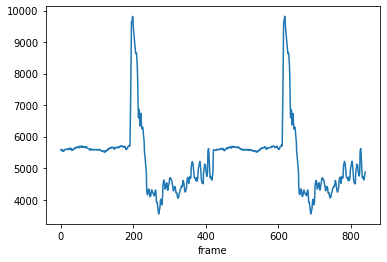

In [126]:
masked_v.plot()

In [127]:
df = get_vid_df('videos/Banned Pokemon Seizure Scene.mp4')

In [128]:
# let's try the same but through numpy array
narr = np.empty((0,),dtype=np.uint8)
# loop through the frames
for f in df.index.levels[0]:
    # save an image to the variable 'frame'
    frame = df.loc[f].iloc[:, :-1].to_numpy().reshape(df.attrs['width'], df.attrs['height'], 3)
    # get the mask
    mask = get_mask(frame)
    narr = np.concatenate([narr, mask.reshape(-1)])

In [129]:
df = df.assign(
    masked_values = narr
)
masked_v = df.groupby('frame').masked_values.sum()

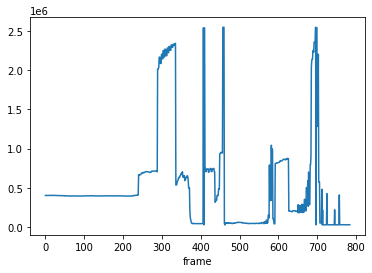

In [130]:
masked_v.plot();